# objective of the analysis


# Predict whether the cancer is benign or malignant based on characteristics of the cell nucle.


# Check radiological images to predict whether a tumor is benign or malignant.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("breast cancer.csv")
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


# About the data 

id
ID number

diagnosis
The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean
mean of distances from center to points on the perimeter

texture_mean
standard deviation of gray-scale values

perimeter_mean
mean size of the core tumor

area_mean

smoothness_mean
mean of local variation in radius lengths

compactness_mean
mean of perimeter^2 / area - 1.0

concavity_mean
mean of severity of concave portions of the contour

concave points_mean
mean for number of concave portions of the contour


## The problem is the classification problem to determine whether the   breast tissue is  Malignant or the begin

### Why should a solve this problem

 1 To predict the stage of the cancer   inorder to determine the method of the treatment plan.
 
 2 To come up with the model  that can increase the accurancy of the detection of the stage of cancer .

### How would i solve the problem

1  Data preparation 
  a Cleaning
  
2 Data visualization to flash out the domain knowlege

3 Data selection

4 Data preprocessing 

5 Data Transformation

6 Fit the classification algorithm

7 Improve the model 

8 Check the accurancy of the model

9 Present the result


# Understanding the data 

In [3]:
#checking the number of rows and columns of the data 
df.shape

(569, 33)

In [4]:
#checking the name sof the columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#checking the data types of the columns
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The data has the correct data types for the machine learning algorithm

In [6]:
#checking  if the data has null data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Data has one coumns which no data at all and it has no  effect  on the analysis so we have to drop it

In [7]:
#getting the general info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#geneal statistic of the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Filtering the data  by  removing|handling incorrect ,missing and handling outliers

#droping a certain column
NOtice  columns Unnamed: 32 as incrorrect data fomart so dropping is not possible so we splice it out our data

        

In [9]:
df.iloc[:,:-1].head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [38]:
output.head(2)

0    M
1    M
Name: diagnosis, dtype: object

In [79]:
#use of dummy varaibles
target=pd.get_dummies(output)
target.head(2)

,B,M
0,0,1
1,0,1


In [80]:
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [82]:
features=data.iloc[:,1:]
features.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


#  Data visualization

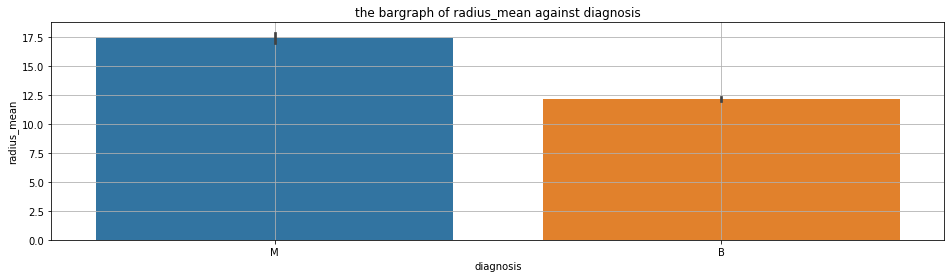

In [49]:
#barplot
plt.figure(figsize=(16,4))
x=df['diagnosis']
y=df['radius_mean']
sns.barplot(x,y)
plt.title('the bargraph of radius_mean against diagnosis')
plt.grid()

It show that the radius_mean has  a more influence  on maligant

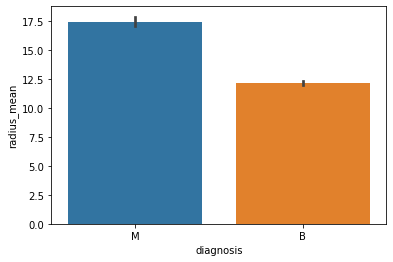

In [50]:
sns.barplot(df['diagnosis'],df['radius_mean'])

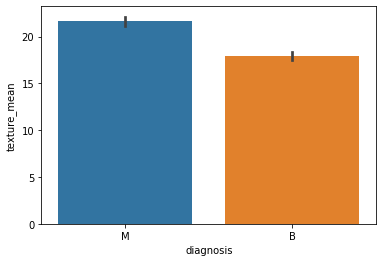

In [51]:
sns.barplot(df['diagnosis'],df['texture_mean'])

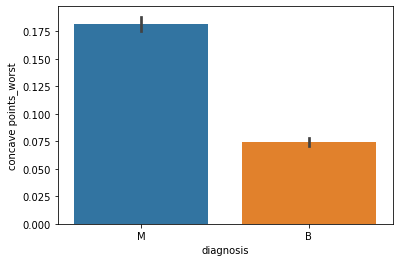

In [52]:
sns.barplot(df['diagnosis'],df['concave points_worst'])

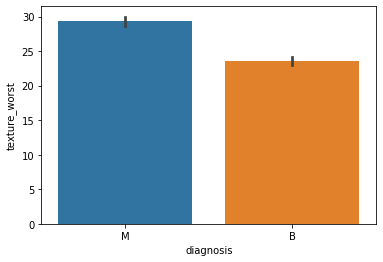

In [53]:
sns.barplot(df['diagnosis'],df['texture_worst'])

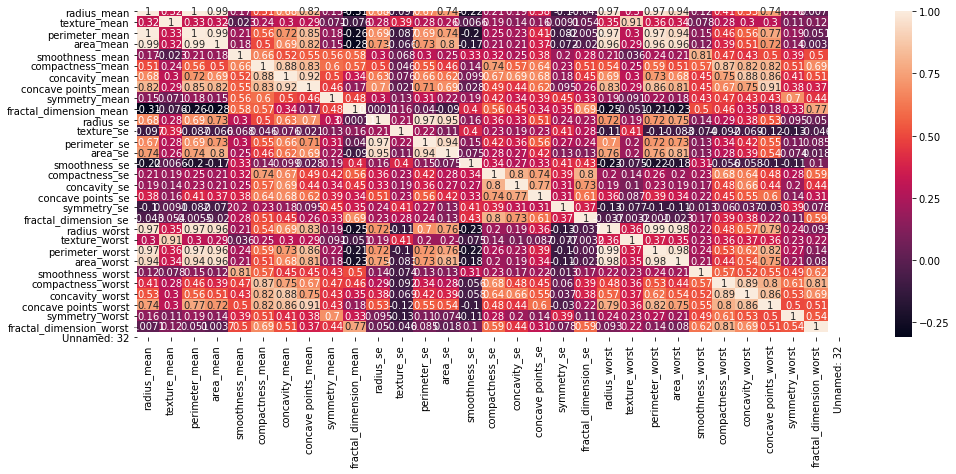

In [54]:
data=df.iloc[:,1:]
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

the correlation is between radius mean,perimeter mean and area mean 
Another correlation is betweeen  perimeter worse ,radius worse and mean worse

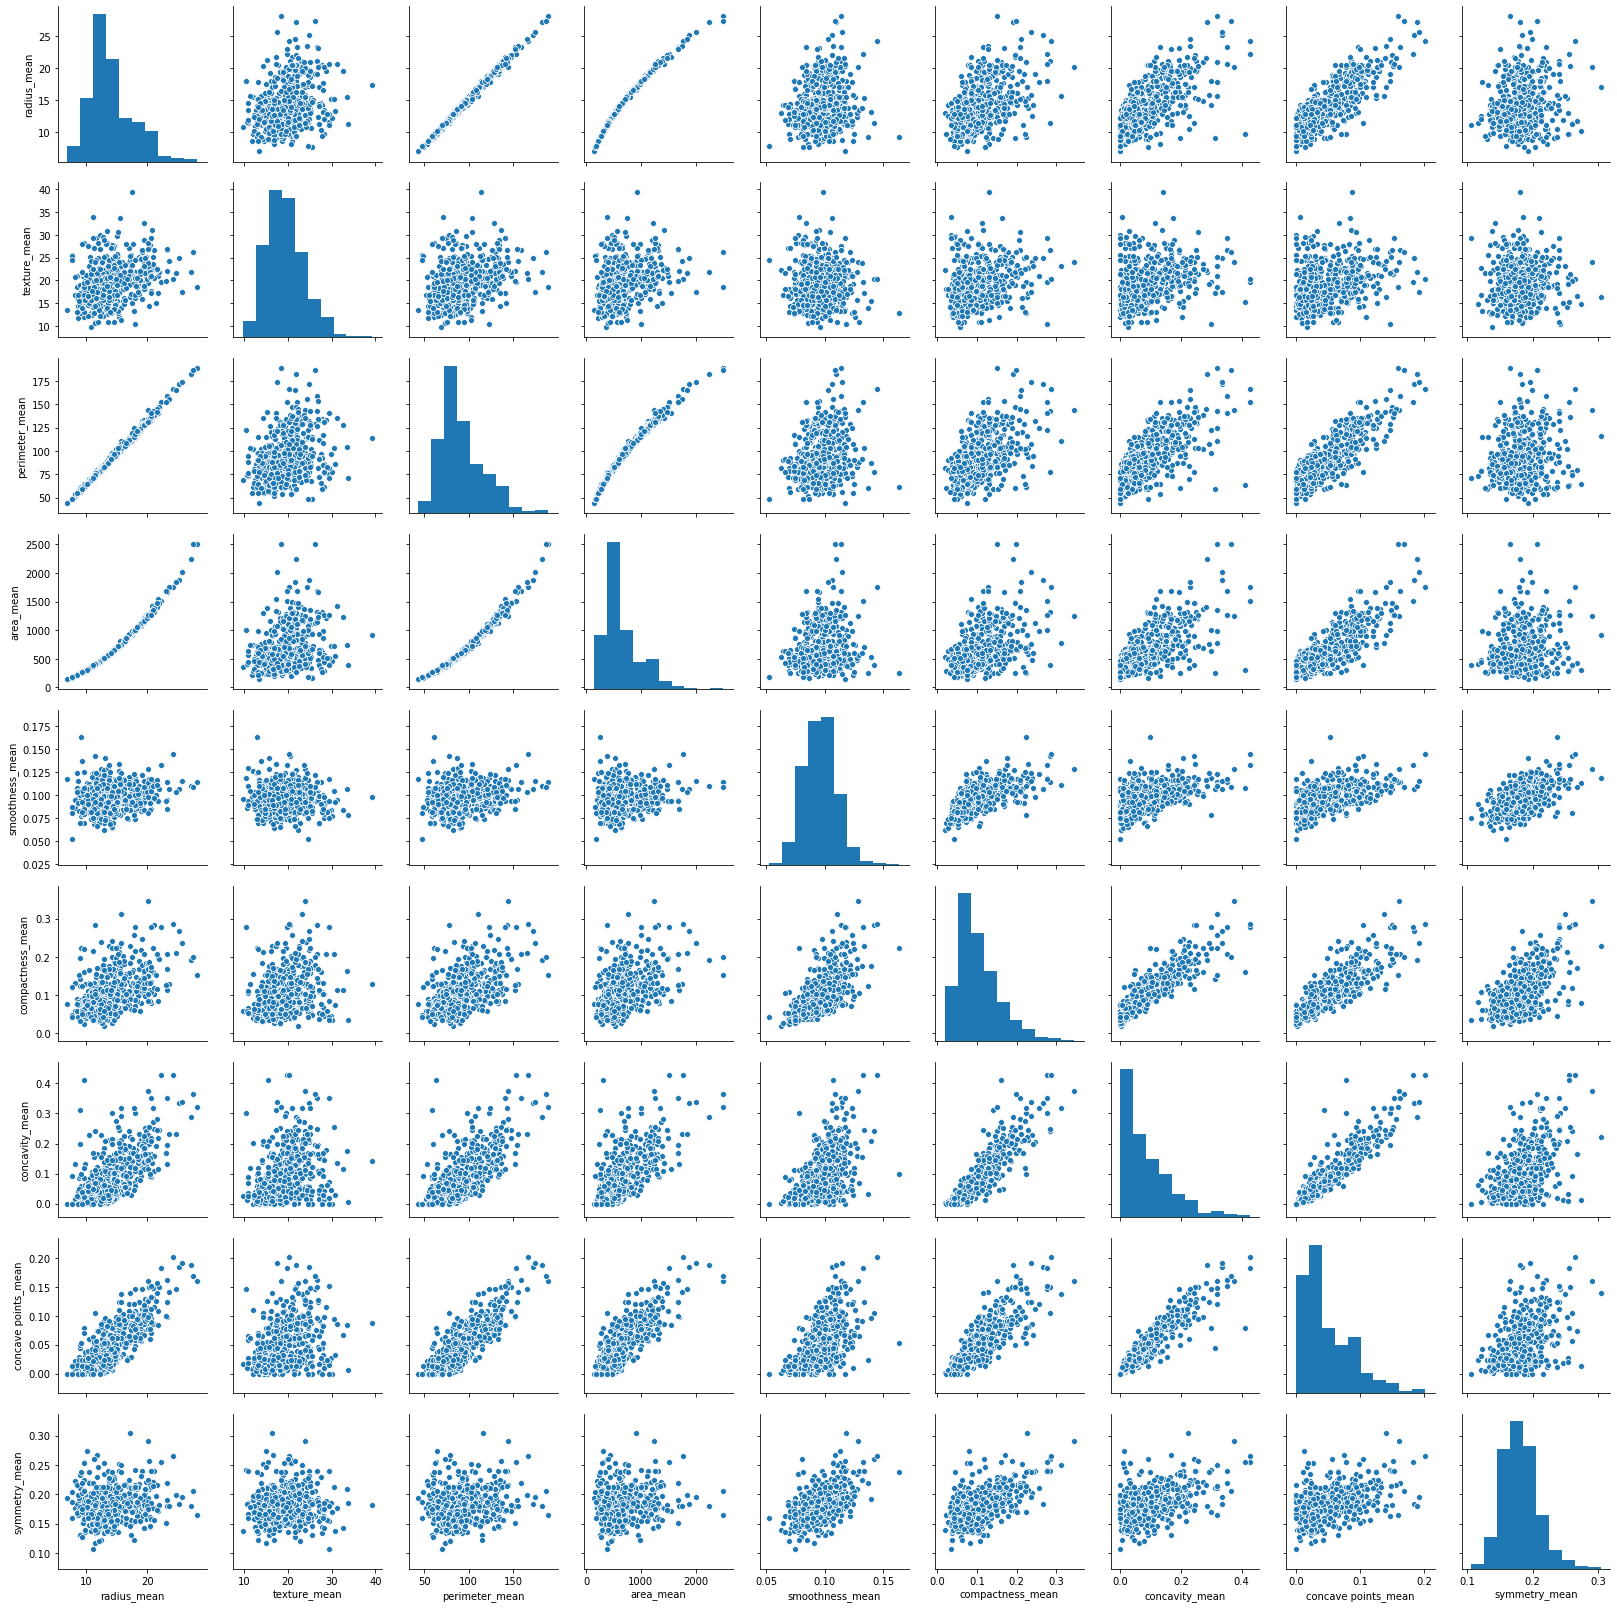

In [55]:
sns.pairplot(data.iloc[:,0:10])

# Feature selection

In [69]:
# output=df['diagnosis']
# output.head(1)
target.head(1)

,B,M
0,0,1


In [77]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [70]:
 #it used the features with the the strongest relationship with the output
from sklearn.feature_selection import SelectKBest

In [71]:
from sklearn.feature_selection import  f_classif

In [72]:
test=SelectKBest(score_func=f_classif,k=5)

In [155]:
print(features)

[[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 ...
 [1.083e+02 5.302e-02 1.898e+01 1.267e+02 1.418e-01]
 [1.401e+02 1.520e-01 2.574e+01 1.846e+02 2.650e-01]
 [4.792e+01 0.000e+00 9.456e+00 5.916e+01 0.000e+00]]


In [156]:
x_selected=test.fit_transform(data,output)

In [157]:
data.shape

(569, 29)

In [158]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

selected features are;
concavity_mean,concavity_se, concavity_worst,symmetry_worst

In [159]:
  # second method of feature selection
    
from sklearn.decomposition import PCA

In [160]:
pca=PCA(n_components=3)

In [161]:
fit=pca.fit(data)

In [163]:
#to summarize
fit.explained_variance_ratio_

array([0.982, 0.016, 0.002])

In [164]:
fit.components_

array([[ 5.086e-03,  2.197e-03,  3.508e-02,  5.168e-01,  4.237e-06,
         4.053e-05,  8.194e-05,  4.778e-05,  7.078e-06, -2.622e-06,
         3.137e-04, -6.510e-05,  2.236e-03,  5.573e-02, -8.056e-07,
         5.519e-06,  8.871e-06,  3.279e-06, -1.241e-06, -8.545e-08,
         7.155e-03,  3.067e-03,  4.946e-02,  8.521e-01,  1.013e-04,
         1.689e-04,  7.367e-05,  1.790e-05,  1.614e-06],
       [ 9.287e-03, -2.882e-03,  6.275e-02,  8.518e-01, -1.482e-05,
        -2.689e-06,  7.514e-05,  4.635e-05, -2.524e-05, -1.612e-05,
        -5.387e-05,  3.484e-04,  8.196e-04,  7.511e-03,  1.494e-06,
         1.274e-05,  2.869e-05,  9.360e-06,  1.226e-05,  2.897e-07,
        -5.687e-04, -1.322e-02, -1.860e-04, -5.197e-01, -2.561e-04,
        -1.755e-04, -3.051e-05, -1.570e-04, -5.531e-05],
       [-1.234e-02, -6.355e-03, -7.167e-02, -2.789e-02,  7.266e-05,
         1.018e-04,  2.660e-04,  3.605e-05,  1.413e-04,  5.064e-05,
         6.062e-03,  6.234e-03,  4.386e-02,  9.902e-01,  4.345e-05,
  

#  Data Transformation

NO need for data transformation here

# Fit the classification algorithm

In [167]:
from sklearn.linear_model import LogisticRegression

# Improve the model

In [26]:
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [74]:
target.head(1)

,B,M
0,0,1


In [86]:
#split the data into testing and training dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)


In [87]:
x_train.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.1175,NaN
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.7584,0.6780,0.29030,0.4098,0.1284,NaN
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.0849,NaN


In [88]:
y_train.head(3)

,B,M
68,1,0
181,0,1
63,1,0


In [89]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()